In [6]:
##1 branch and college according to Rank
import pandas as pd
import numpy as np

# Load datasets
file = pd.read_csv('combined2.csv')
seats_file = pd.read_csv('Seat_State_Matrix.csv')
seats_file.dropna(subset='Total (includes Female Supernumerary)', inplace=True)

# Filter IIT and non-IIT data for round 6 and year 2023
file1 = file.loc[
    (file['Round'] == 6) & 
    (file['Year'] == 2023) & 
    (file['Institute'].str.contains('Indian Institute  of Technology', case=False, na=False))
]

file2 = file.loc[
    (file['Round'] == 6) & 
    (file['Year'] == 2023) & 
    (~(file['Institute'].str.contains('Indian Institute  of Technology', case=False, na=False)))
]

# Get user inputs
adv_rank = int(input("Enter Your Advanced Rank:"))
mains_rank = int(input("Enter Your Mains Rank:"))
seatty = input("Enter Your seat type(OPEN,EWS,OBC-NCL,SC,ST,EWS (PwD),OBC-NCL (PwD),OPEN (PwD), SC (PwD), ST(PwD)):")
gender = input("Enter Your Gender(Male,Female):")
state = input("Enter Your State:")
state = state.upper()

# Filter state quota from seats_file
state_quota = seats_file.loc[seats_file['State/All India Seats'] == state]
home_state_institute = state_quota['Institute Name']

# Define gender list based on input
gender_list = ['Female-only (including Supernumerary)'] if gender.lower() == 'female' else ['Gender-Neutral']

# Convert ranks to numeric, coercing errors to NaN, and drop rows with NaN values in relevant columns
for df in [file1, file2]:
    df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
    df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')
    df.dropna(subset=['Closing Rank', 'Institute'], inplace=True)

# Filter choices for IITs
choices_iit = file1.loc[
    (adv_rank >= file1['Opening Rank']) & 
    (adv_rank <= file1['Closing Rank']) & 
    (seatty.upper() == file1['Seat Type']) & 
    (file1['Gender'].isin(gender_list))
]

# Filter choices for other institutes
choices_other = file2.loc[
    (mains_rank >= file2['Opening Rank']) & 
    (mains_rank <= file2['Closing Rank']) & 
    (seatty.upper() == file2['Seat Type']) & 
    (file2['Gender'].isin(gender_list)) & 
    (
        (file2['Quota'] == 'OS') | 
        (file2['Quota'] == 'AI') )
]

choices_home = file2.loc[(mains_rank >= file2['Opening Rank']) & 
    (mains_rank <= file2['Closing Rank']) & 
    (seatty.upper() == file2['Seat Type']) & 
    (file2['Gender'].isin(gender_list)) &
    (file2['Quota']== 'HS') &
    (file2['Institute'].values[0] == home_state_institute)
]

# Concatenate and sort the choices
choices_other = pd.concat([choices_home,choices_other])
choices = pd.concat([choices_iit, choices_other]).sort_values(by='Opening Rank')

# Print the filtered choices without index
print(choices[['Institute', 'Academic Program Name']].to_string(index=False))

C:\Users\91934\AppData\Local\Temp\ipykernel_22672\2787185437.py:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('combined2.csv')


                                                                                                                    Institute                                                                                                                                Academic Program Name
                                                                     Indian Institute of Information Technology(IIIT) Dharwad                                                                                   Computer Science and Engineering (4 Years, Bachelor of Technology)
                                                                          Indian Institute of Information Technology Guwahati                                                                          Electronics and Communication Engineering (4 Years, Bachelor of Technology)
                                                                                Indian Institute  of Technology (ISM) Dhanbad                                                  

C:\Users\91934\AppData\Local\Temp\ipykernel_22672\2787185437.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
C:\Users\91934\AppData\Local\Temp\ipykernel_22672\2787185437.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')
C:\Users\91934\AppData\Local\Temp\ipykernel_22672\2787185437.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

C:\Users\91934\AppData\Local\Temp\ipykernel_22672\3238534522.py:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined2.csv')


Top 10 Most Popular Branches Based on Rank Difference:
364986    Computer Science and Engineering (4 Years, Bac...
365266    Computer Science and Engineering (5 Years, Bac...
365346    Mathematics and Computing (4 Years, Bachelor o...
365014    Electrical Engineering (4 Years, Bachelor of T...
365359    Mathematics and Computing (5 Years, Bachelor a...
366757    Data Science and Artificial Intelligence (4 Ye...
365291    Electrical Engineering (Power and Automation) ...
365864    Artificial Intelligence (4 Years, Bachelor of ...
365027    Electrical Engineering (5 Years, Bachelor and ...
366229    Mathematics and Scientific Computing (4 Years,...
Name: Academic Program Name, dtype: object


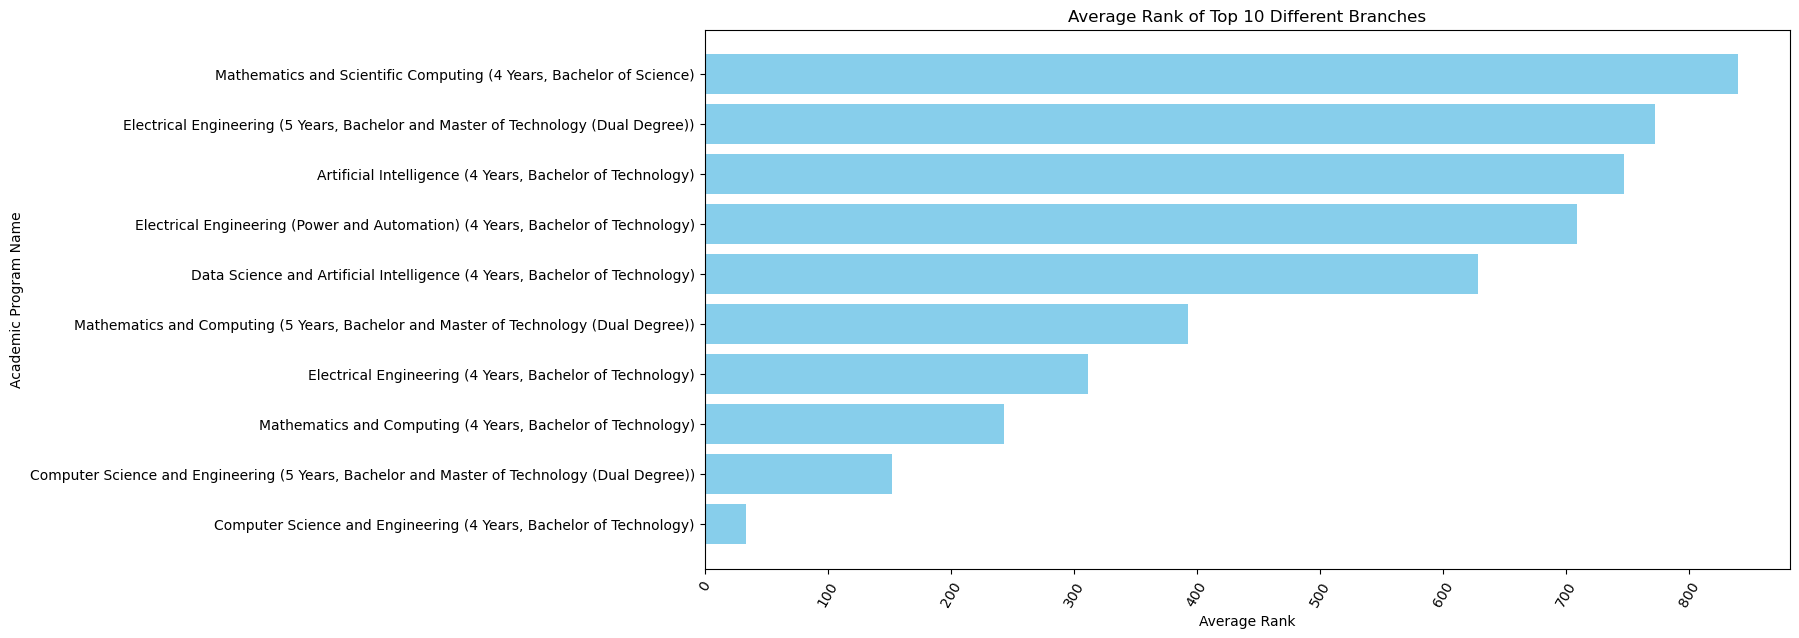

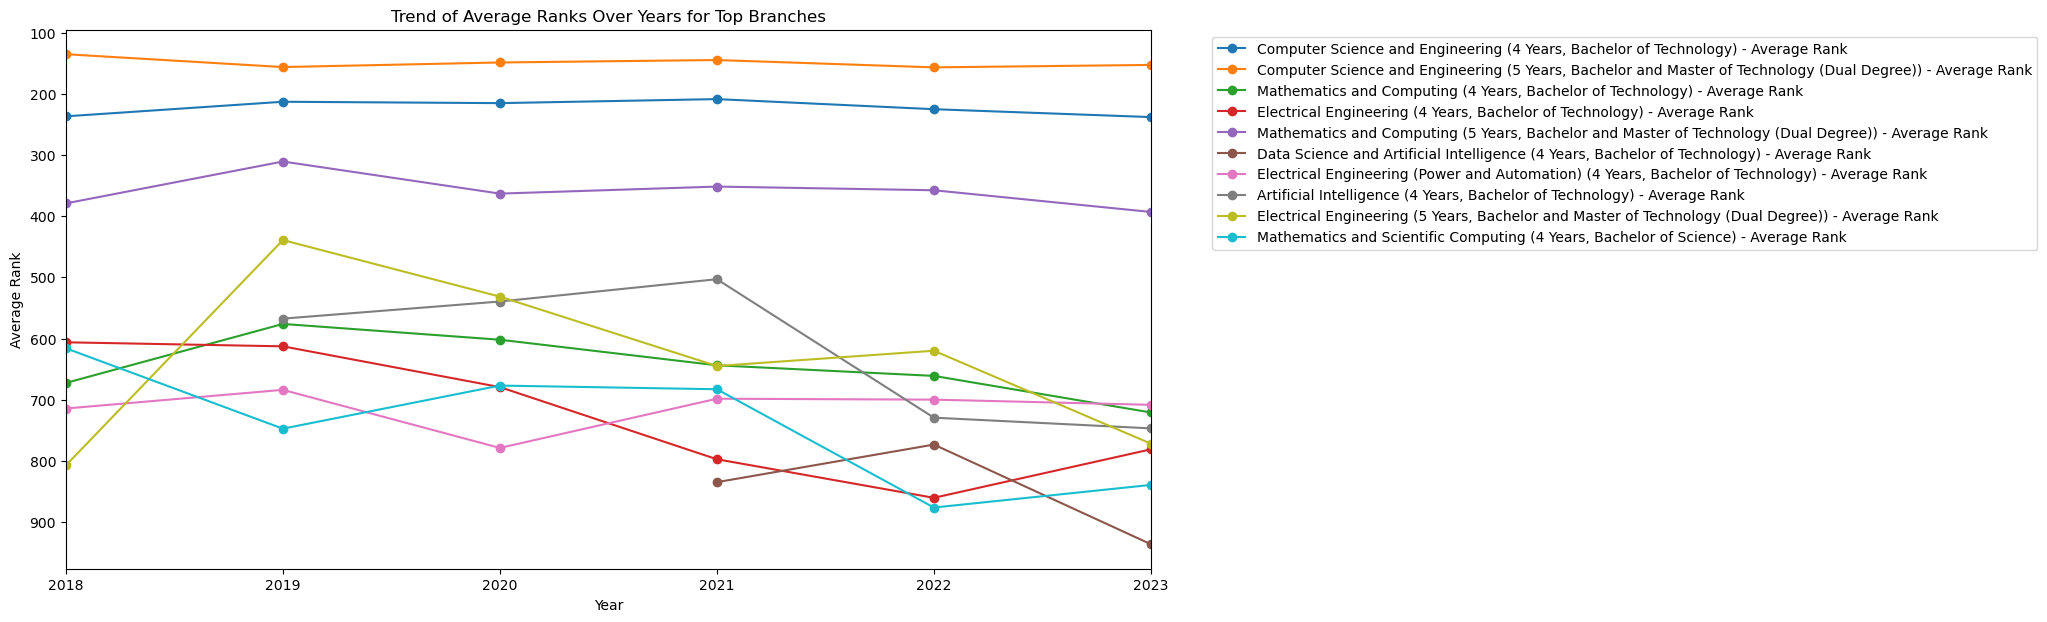

In [37]:
##2 branch popularity
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('combined2.csv')

# Ensure the relevant columns are present and convert ranks to numeric
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')

# Drop rows with NaN values in 'Opening Rank' or 'Closing Rank'
df.dropna(subset=['Opening Rank', 'Closing Rank'], inplace=True)

# Calculate the rank difference and average rank
df['Rank Difference'] = df['Closing Rank'] - df['Opening Rank']
df['Average Rank'] = (df['Closing Rank'] + df['Opening Rank']) / 2

# Filter the dataset based on specific conditions
df_filtered = df.loc[(df['Gender'] == 'Gender-Neutral') & (df['Quota'] == 'AI') & 
                     (df['Seat Type'] == 'OPEN') & (df['Round'] == 6) & 
                     (df['Year']==2023) &
                     (~df['Institute'].str.contains('Architecture', na=False)) & 
                     (~df['Academic Program Name'].str.contains('Architecture', na=False))]

# Sort by Year (descending), then by Average Rank and Rank Difference (ascending)
sorted_by_popularity = df_filtered.sort_values(by=['Average Rank', 'Rank Difference'])

# Drop duplicates based on 'Academic Program Name' to get unique branches
df_unique_branches = sorted_by_popularity.drop_duplicates(subset='Academic Program Name', keep='first')

# Select the top 10 branches based on the sorted order
top_10 = df_unique_branches.head(10)

# Display the top 10 most popular branches
print("Top 10 Most Popular Branches Based on Rank Difference:")
print(top_10['Academic Program Name'])

# Visualization: Plot average rank over branches
plt.figure(figsize=(14, 7))
plt.barh(top_10['Academic Program Name'], top_10['Average Rank'], color='skyblue')
plt.xlabel('Average Rank')
plt.ylabel('Academic Program Name')
plt.title('Average Rank of Top 10 Different Branches')
plt.xticks(rotation=60)
plt.show()

# If the data includes multiple years, perform trend analysis
top_institutes = df.loc[df['Year'] == 2023].groupby('Institute')['Average Rank'].mean().nsmallest(10).index.tolist()
df_filtered_all_years = df.loc[(df['Gender'] == 'Gender-Neutral') & (df['Quota'] == 'AI') & 
                               (df['Seat Type'] == 'OPEN') & (df['Round'] == 6) & 
                               (df['Institute'].isin(top_institutes)) & 
                               (df['Year'] >= 2016) & (df['Year'] <= 2023) &
                               (~df['Institute'].str.contains('Architecture', na=False)) & 
                               (~df['Academic Program Name'].str.contains('Architecture', na=False))]

if 'Year' in df.columns:
    trend_data = df_filtered_all_years[df_filtered_all_years['Academic Program Name'].isin(top_10['Academic Program Name'])]
    
    # Aggregate data to get average rank per year for each branch
    trend_data = trend_data.groupby(['Year', 'Academic Program Name']).agg({
        'Average Rank': 'mean'
    }).reset_index()
    
    # Plot trends for the selected branches
    plt.figure(figsize=(14, 7))
    for branch in top_10['Academic Program Name']:
        branch_data = trend_data[trend_data['Academic Program Name'] == branch]
        plt.plot(branch_data['Year'], branch_data['Average Rank'], label=f'{branch} - Average Rank', marker='o')
    
    plt.xlim(2018, 2023)
    plt.xlabel('Year')
    plt.ylabel('Average Rank')
    plt.gca().invert_yaxis()  
    plt.title('Trend of Average Ranks Over Years for Top Branches')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


C:\Users\91934\AppData\Local\Temp\ipykernel_22672\1054993372.py:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined2.csv')
C:\Users\91934\AppData\Local\Temp\ipykernel_22672\1054993372.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_data['Average Rank'] = (college_data['Opening Rank']+college_data['Closing Rank'])/2


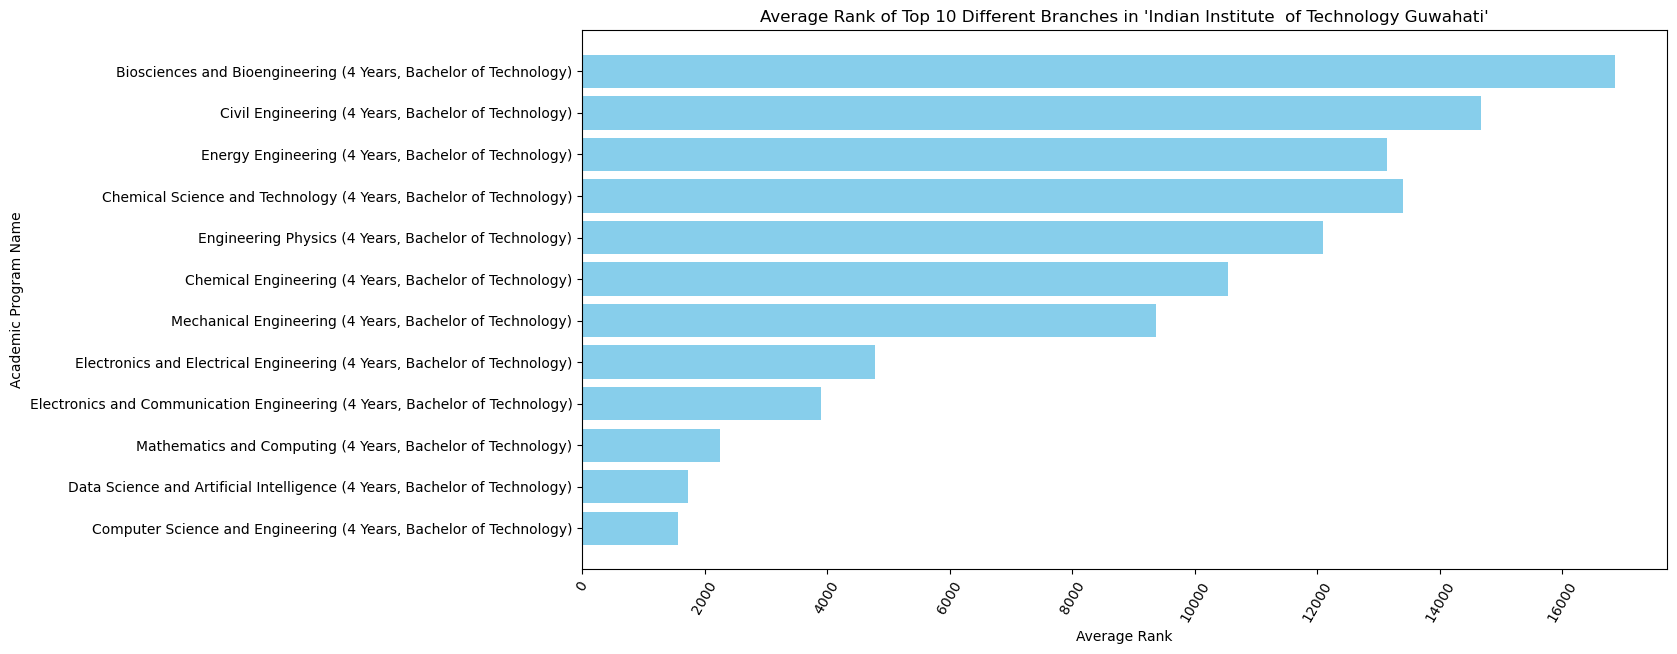

In [8]:
##3 college-wise branch popularity
import pandas as pd # type: ignore
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('combined2.csv')

# Ensure the relevant columns are present and convert ranks to numeric
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')
df.dropna(subset = 'Closing Rank',inplace=True)

combined_2023 = df.loc[df.Year==2023]

college_name = input("Enter the college name")
seatty = input("Enter Your seat type(OPEN,EWS,OBC-NCL,SC,ST,EWS (PwD),OBC-NCL (PwD),OPEN (PwD), SC (PwD), ST(PwD)):")
gender = input("Enter Your Gender(Male,Female):")
quota = input('Enter Your Quota(AI,OS,HS):')

seatty = seatty.upper()
quota = quota.upper()
gender = gender.lower()
gender_list = ['Female-only (including Supernumerary)'] if gender== 'female' else ['Gender-Neutral']

college_data = combined_2023[(combined_2023.Institute == college_name) & (combined_2023['Seat Type'] == seatty) & (combined_2023['Gender'].isin(gender_list)) &  (combined_2023['Quota'] == quota)]
college_data['Average Rank'] = (college_data['Opening Rank']+college_data['Closing Rank'])/2

college_data = college_data[['Academic Program Name', 'Average Rank']]
sorted_college_data = college_data.sort_values(by='Average Rank')
sorted_college_data.head(10).reset_index(drop=True)
plt.figure(figsize=(14, 7))
plt.barh(sorted_college_data['Academic Program Name'], sorted_college_data['Average Rank'], color='skyblue')
plt.xlabel('Average Rank')
plt.gca().invert_yaxis()  
plt.ylabel('Academic Program Name')
plt.title(f"Average Rank of Top 10 Different Branches in '{college_name}'")
plt.xticks(rotation=60)
plt.show()


C:\Users\91934\AppData\Local\Temp\ipykernel_22672\640385282.py:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined2.csv')
C:\Users\91934\AppData\Local\Temp\ipykernel_22672\640385282.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_data['Average Rank'] = (college_data['Opening Rank']+college_data['Closing Rank'])/2


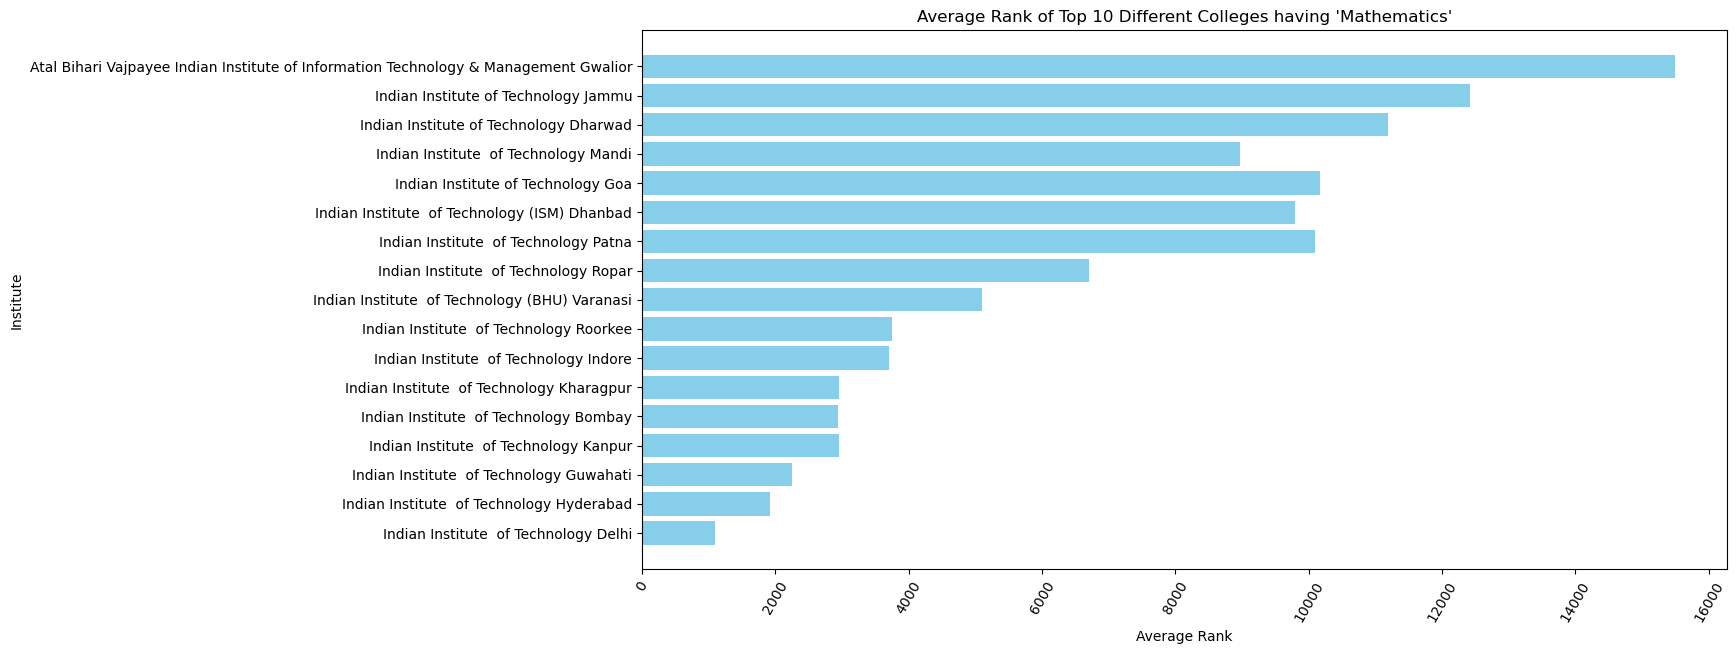

In [4]:
##4 branch-wise college popularity
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('combined2.csv')

# Ensure the relevant columns are present and convert ranks to numeric
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')
df.dropna(subset = 'Closing Rank',inplace=True)

combined_2023 = df.loc[df.Year==2023]

branch = input("Enter the branch name")
seatty = input("Enter Your seat type(OPEN,EWS,OBC-NCL,SC,ST,EWS (PwD),OBC-NCL (PwD),OPEN (PwD), SC (PwD), ST(PwD)):")
gender = input("Enter Your Gender(Male,Female):")
quota = input('Enter Your Quota(AI,OS,HS):')

seatty = seatty.upper()
quota = quota.upper()
gender = gender.lower()
gender_list = ['Female-only (including Supernumerary)'] if gender== 'female' else ['Gender-Neutral']

college_data = combined_2023[(combined_2023['Academic Program Name'].str.contains(branch,case = False)) & (combined_2023['Seat Type'] == seatty) & (combined_2023['Gender'].isin(gender_list)) &  (combined_2023['Quota'] == quota)]
college_data['Average Rank'] = (college_data['Opening Rank']+college_data['Closing Rank'])/2

college_data = college_data[['Institute', 'Average Rank']]
sorted_college_data = college_data.sort_values(by='Average Rank')
sorted_college_data.head(10).reset_index(drop=True)
plt.figure(figsize=(14, 7))
plt.barh(sorted_college_data['Institute'], sorted_college_data['Average Rank'], color='skyblue')
plt.xlabel('Average Rank')
plt.ylabel('Institute')
plt.title(f"Average Rank of Top 10 Different Colleges having '{branch}'")
plt.xticks(rotation=60)
plt.show()


C:\Users\91934\AppData\Local\Temp\ipykernel_22672\2973352255.py:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined2.csv')


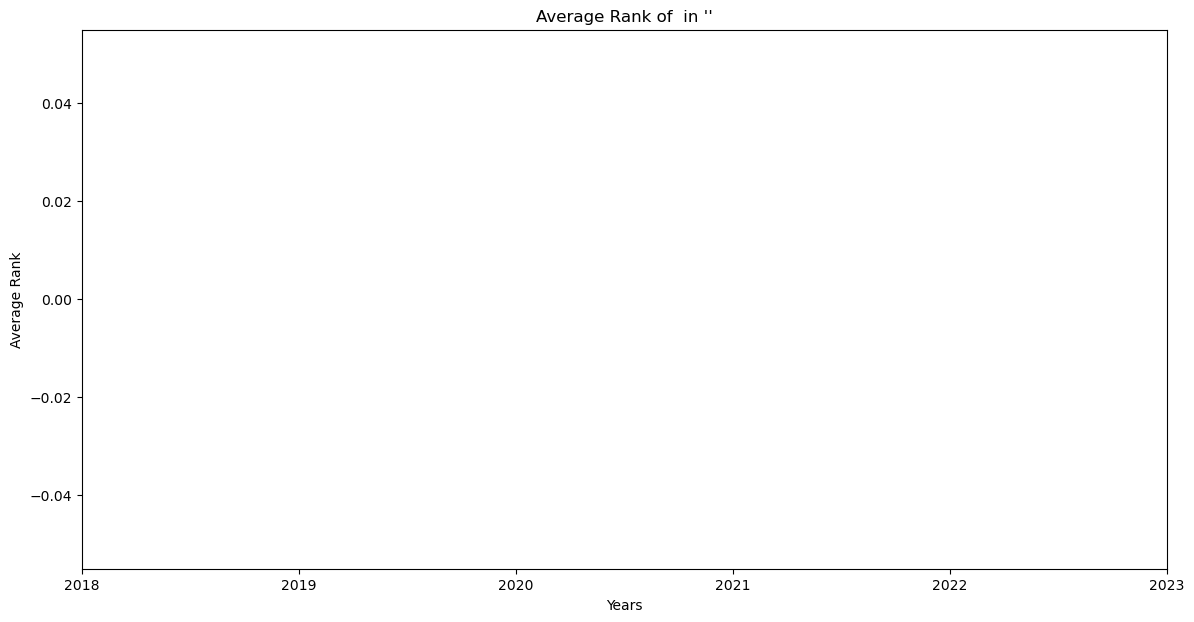

In [10]:
##5 Branch and College Trend over Years
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('combined2.csv')
college_name = input("Enter the college name: ")
branch = input("Enter the branch name: ")
seatty = input("Enter Your seat type(OPEN,EWS,OBC-NCL,SC,ST,EWS (PwD),OBC-NCL (PwD),OPEN (PwD), SC (PwD), ST(PwD)):")
gender = input("Enter Your Gender(Male,Female):")
quota = input('Enter Your Quota(AI,OS,HS):')

df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')

df = df.dropna(subset=['Closing Rank', 'Opening Rank'])

seatty = seatty.upper()
quota = quota.upper()
gender = gender.lower()
gender_list = ['Female-only (including Supernumerary)'] if gender== 'female' else ['Gender-Neutral']
df['Average Rank'] = (df['Closing Rank'] +df['Opening Rank'])/2

college_data = df[(df.Institute == college_name) & (df['Seat Type'] == seatty) & (df['Gender'].isin(gender_list)) &  (df['Quota'] == quota) & (df['Round']==6) & (df['Academic Program Name'].str.contains(branch, case=False))]

# Sort the data by year
college_data = college_data.sort_values(by='Year')

plt.figure(figsize=(14, 7))
plt.bar(college_data['Year'], college_data['Average Rank'])
plt.xlim(2018, 2023)
plt.xlabel('Years')
plt.ylabel('Average Rank')
plt.title(f"Average Rank of {branch} in {college_name}")
plt.show()


C:\Users\91934\AppData\Local\Temp\ipykernel_22672\2590150786.py:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined2.csv')


Top 10 Most Popular New Branches Based on Average Rank:
                                    Academic Program Name  \
313483  Electrical Engineering (IC Design and Technolo...   
313293  Mathematics and Computing (4 Years, Bachelor o...   
313449  Computational Engineering (4 Years, Bachelor o...   
314386  Mathematics & Computing (5 Years, Bachelor of ...   
314069  Artificial Intelligence and Data Science (4 Ye...   
313802  Statistics and Data Science (4 Years, Bachelor...   
198319  Engineering and Computational Mechanics (4 Yea...   
261834  Integrated B. Tech.(IT) and M. Tech (IT) (5 Ye...   
321862  Computer Science Engineering (Artificial lntel...   
151536  Computer Science and Artificial Intelligence (...   

                                                Institute  
313483          Indian Institute  of Technology Hyderabad  
313293          Indian Institute  of Technology Kharagpur  
313449          Indian Institute  of Technology Hyderabad  
314386            Indian Institu

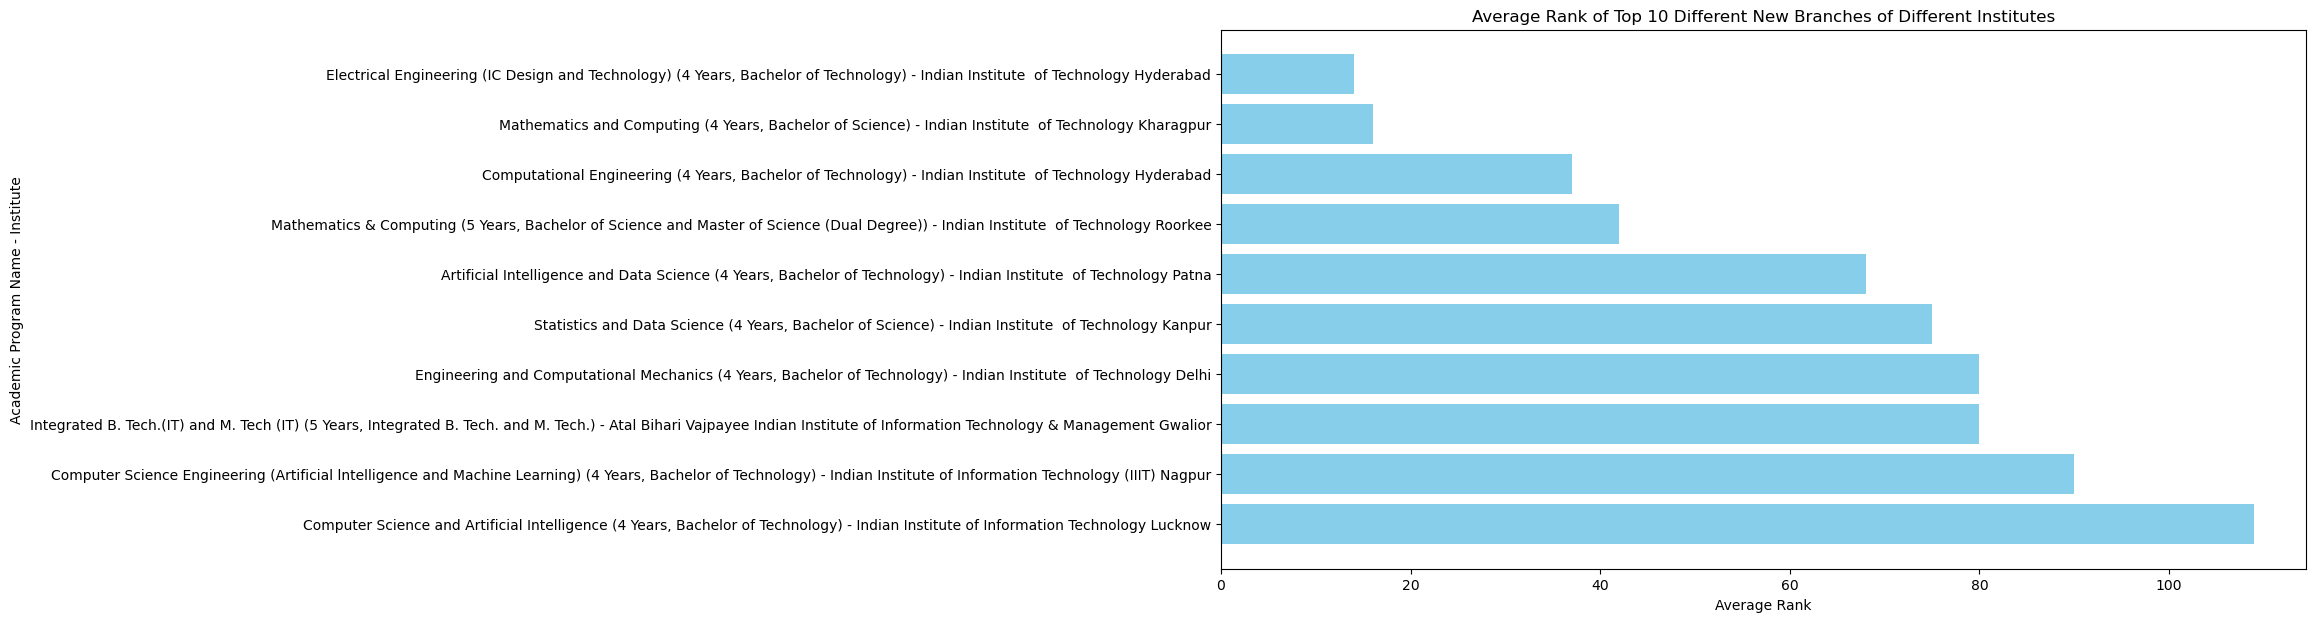

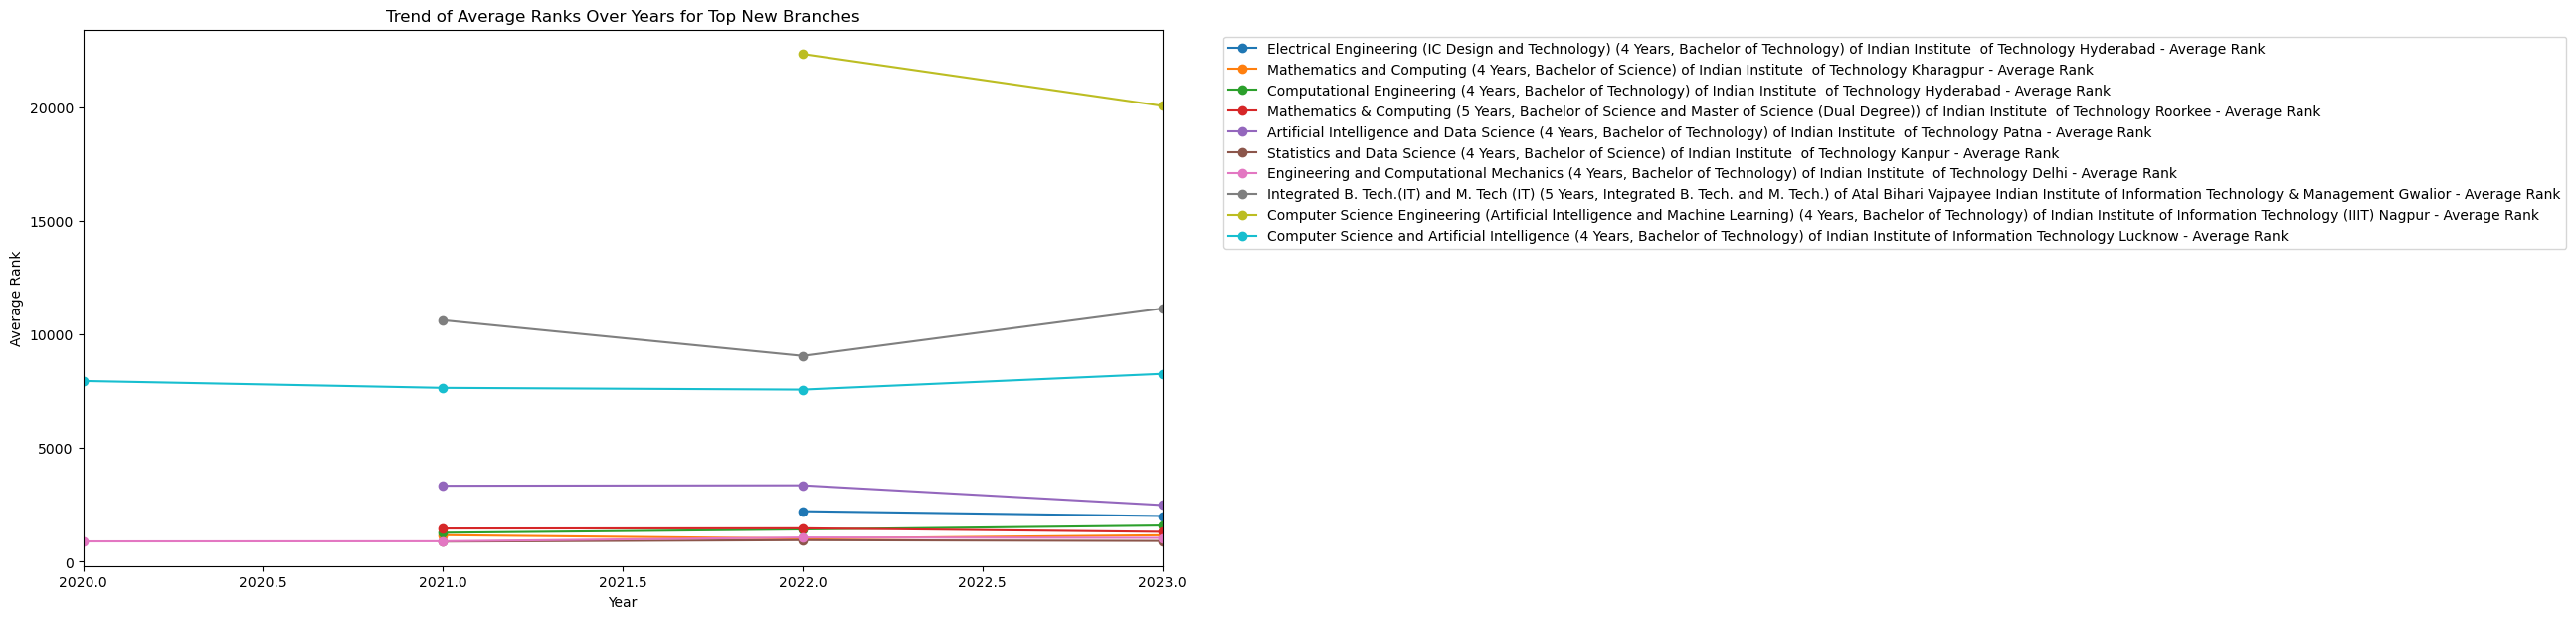

In [21]:
##6 new branches popularity
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('combined2.csv')

# Ensure the relevant columns are present and convert ranks to numeric
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')

# Drop rows with NaN values in 'Opening Rank' or 'Closing Rank'
df.dropna(subset=['Opening Rank', 'Closing Rank'], inplace=True)

# Calculate the rank difference and average rank
df['Rank Difference'] = df['Closing Rank'] - df['Opening Rank']
df['Average Rank'] = (df['Closing Rank'] + df['Opening Rank']) / 2

# Filter the dataset based on specific conditions
df_filtered = df.loc[(df['Gender'] == 'Gender-Neutral') & 
                     (df['Quota'] == 'AI') & 
                     (df['Seat Type'] == 'OPEN') & 
                     (df['Round'] == 6) & 
                     (~df['Institute'].str.contains('Architecture', na=False)) & 
                     (~df['Academic Program Name'].str.contains('Architecture', na=False))]

# Identify unique branches from the initial data
df_unique_branches = df_filtered.drop_duplicates(subset='Academic Program Name', keep='first')['Academic Program Name']

# Identify new branches introduced after 2019
new_branches = pd.DataFrame()

for branch in df_unique_branches:
    df_branch = df[df['Academic Program Name'] == branch]
    if df_branch['Year'].min() > 2019:
        new_branches = pd.concat([new_branches, df_branch])

# Sort by average rank and rank difference
sorted_by_popularity = new_branches.sort_values(by=['Average Rank', 'Rank Difference'])

# Select the top 10 branches based on the sorted order
top_10 = sorted_by_popularity.drop_duplicates(subset=['Academic Program Name','Institute']).head(10)

# Display the top 10 most popular new branches
print("Top 10 Most Popular New Branches Based on Average Rank:")
print(top_10[['Academic Program Name', 'Institute']])

# Visualization: Plot average rank over branches
plt.figure(figsize=(14, 7))
plt.barh(top_10['Academic Program Name'] + ' - ' + top_10['Institute'], top_10['Average Rank'], color='skyblue')
plt.xlabel('Average Rank')
plt.ylabel('Academic Program Name - Institute')
plt.title('Average Rank of Top 10 Different New Branches of Different Institutes')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rank at the top
plt.show()

# If the data includes multiple years, perform trend analysis
if 'Year' in df.columns:
    # Filter the data for the trend analysis
    trend_data = df_filtered[df_filtered['Academic Program Name'].isin(top_10['Academic Program Name']) & 
                             df_filtered['Institute'].isin(top_10['Institute'])]
    
    # Plot trends for the selected branches
    plt.figure(figsize=(14, 7))
    for branch in top_10[['Academic Program Name', 'Institute']].itertuples(index=False):
        branch_data = trend_data[(trend_data['Academic Program Name'] == branch[0]) & (trend_data['Institute'] == branch[1])]
        plt.plot(branch_data['Year'], branch_data['Average Rank'], label=f'{branch[0]} of {branch[1]} - Average Rank', marker='o')
    
    plt.xlim(2020, 2023)
    plt.xlabel('Year')
    plt.ylabel('Average Rank')
    plt.title('Trend of Average Ranks Over Years for Top New Branches')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


In [33]:
##7 Preparatory Rank List
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('combined2.csv')

# Ensure the relevant columns are present and convert ranks to numeric
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')
df.dropna(subset=['Institute','Opening Rank'],inplace=True)

# Drop rows with NaN values in 'Opening Rank' or 'Closing Rank'
df_prep = df[df['Closing Rank'].isnull()]

seatty = input("Enter Your seat type(OPEN,EWS,OBC-NCL,SC,ST,EWS (PwD),OBC-NCL (PwD),OPEN (PwD), SC (PwD), ST(PwD)):")
gender = input("Enter Your Gender(Male,Female):")
year = int(input('Enter year you want to check'))

seatty = seatty.upper()
gender = gender.lower()
gender_list = ['Female-only (including Supernumerary)'] if gender == 'female' else ['Gender-Neutral']

prep_list = df_prep[(df['Round']==6) &(df_prep['Seat Type'] == seatty) & (df_prep['Gender'].isin(gender_list)) ]
prep_list.sort_values(by = 'Opening Rank',ascending = False)
print(prep_list[['Institute','Academic Program Name','Opening Rank']])


C:\Users\91934\AppData\Local\Temp\ipykernel_22672\2832582472.py:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined2.csv')


ValueError: invalid literal for int() with base 10: ''

In [53]:
##8 corresponding rounds prediction
import numpy as np
import pandas as pd

df = pd.read_csv('combined2.csv')
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')
df.dropna(subset = 'Closing Rank',inplace=True)

seatty = input("Enter Your seat type(OPEN,EWS,OBC-NCL,SC,ST,EWS (PwD),OBC-NCL (PwD),OPEN (PwD), SC (PwD), ST(PwD)):")
gender = input("Enter Your Gender(Male,Female):")
quota = input('Enter Your Quota(AI,HS,OS):')

seatty = seatty.upper()
gender = gender.lower()
quota = quota.upper()
gender_list = ['Female-only (including Supernumerary)'] if gender == 'female' else ['Gender-Neutral']

df = df[(df['Year']==2023) & (df['Seat Type'] == seatty) & (df['Gender'].isin(gender_list)) & (df['Quota'] == quota)]
target_branch = input('Enter Target Branch:')
target_college = input('Enter Target College:')
rank = int(input('Enter Rank'))
rank_target = int(input('Enter Target branch Current Closing Rank'))
round_no = int(input('Enter Current Round Number'))
df_refined = df[(df['Academic Program Name'].str.contains(target_branch, case=False)) & (df['Institute'] == target_college) & ((df['Round'] == round_no) | (df['Round'] == 6))]
branches = df_refined.drop_duplicates(subset='Academic Program Name', keep='first')
for branch in branches['Academic Program Name']:
    df_temp = df_refined[(df_refined['Round'] == round_no)]
    df_6 = df_refined[(df_refined['Round'] == 6)]
    diff = df_temp['Closing Rank'].values[0] - df_6['Closing Rank'].values[0]
    diff = diff*0.9
    if (diff > (rank - rank_target) & (rank > df_temp['Opening Rank'].values[0]) ) :
        print(f'Can get {branch} in {target_college} in final round')
    else :
        print(f'Cannot get {branch} in {target_college} in final round')

C:\Users\91934\AppData\Local\Temp\ipykernel_22672\3431767227.py:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined2.csv')


Cannot get Mechanical Engineering (4 Years, Bachelor of Technology) in Indian Institute  of Technology Guwahati in final round
